In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("biometrics_cleaned_backup.csv")
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True, errors='coerce')
df = df.dropna(subset=['date'])
df['total_bio'] = df['bio_age_5_17'] + df['bio_age_17_']
df['month'] = df['date'].dt.to_period('M')

         date  total_bio
0  2025-03-01    8322222
1  2025-04-01    8641679
2  2025-05-01    7879956
3  2025-06-01    7899289
4  2025-07-01    9792552
5  2025-09-01     317180
6  2025-09-02     301984
7  2025-09-03     308206
8  2025-09-04     272576
9  2025-09-05      94291
10 2025-09-06     236458
11 2025-09-07      31968
12 2025-09-08     387925
13 2025-09-09     411316
14 2025-09-10     365713
15 2025-09-11     412601
16 2025-09-12     432655
17 2025-09-13     307086
18 2025-09-14      51409
19 2025-09-15     453198
20 2025-09-16     461068
21 2025-09-17     398555
22 2025-09-18     451849
23 2025-09-19     428045
24 2025-09-20     389424
25 2025-10-13       3378
26 2025-10-15     261037
27 2025-10-16     267455
28 2025-10-17     318880
29 2025-10-18     323082
30 2025-10-19     342412
31 2025-10-20      37156
32 2025-10-21      32961
33 2025-10-22       1681
34 2025-10-23       9751
35 2025-10-24     257026
36 2025-10-25     378917
37 2025-10-26     373145
38 2025-10-27     336524


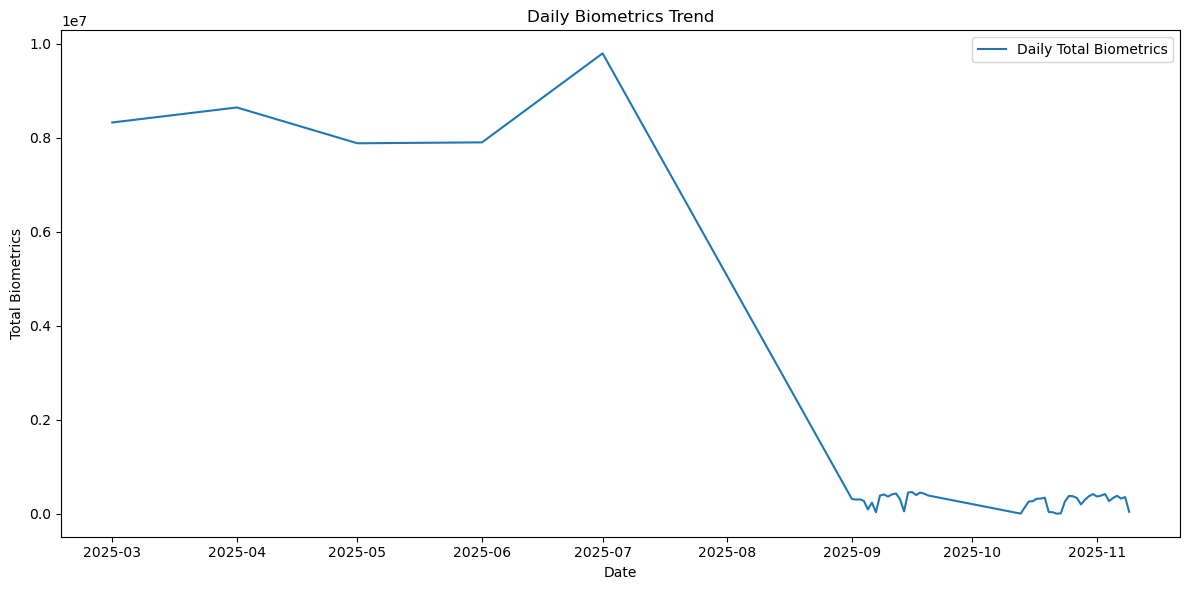

In [31]:
#daily trend
daily = df.groupby('date')['total_bio'].sum().reset_index()
print(daily)
plt.figure(figsize=(12,6))
plt.plot(daily['date'], daily['total_bio'], label="Daily Total Biometrics")
plt.title("Daily Biometrics Trend")
plt.xlabel("Date")
plt.ylabel("Total Biometrics")
plt.legend()
plt.tight_layout()
plt.show()


     month  total_bio
0  2025-03    8322222
1  2025-04    8641679
2  2025-05    7879956
3  2025-06    7899289
4  2025-07    9792552
5  2025-09    6513507
6  2025-10    4233854
7  2025-11    2883369


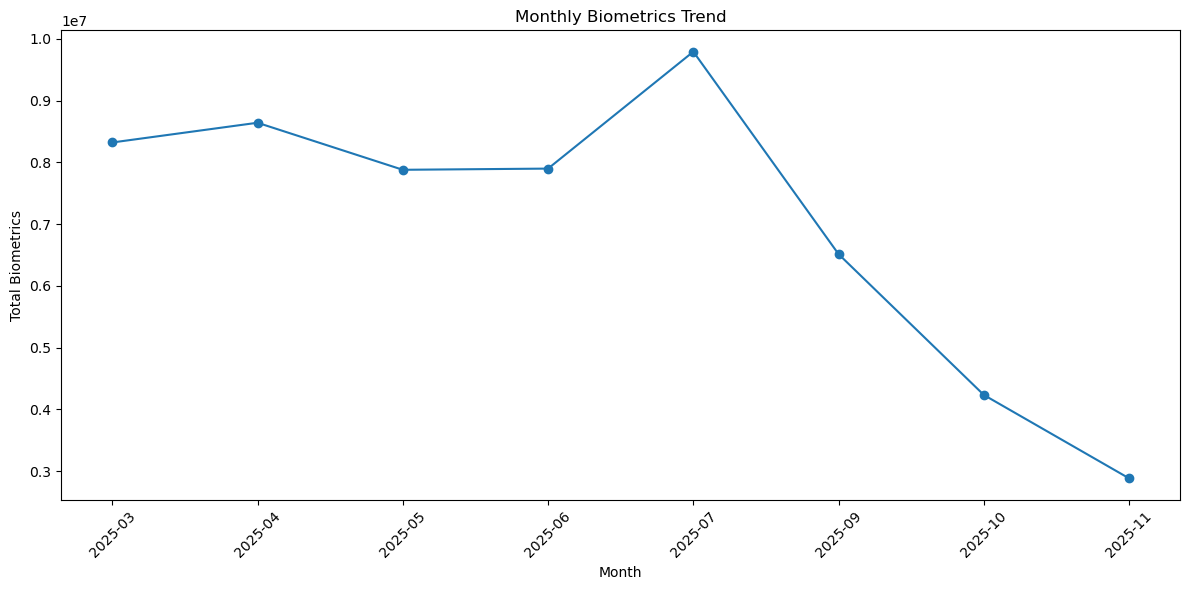

In [32]:
#monthly trend
monthly = df.groupby('month')['total_bio'].sum().reset_index()
monthly['month'] = monthly['month'].astype(str)
print (monthly)
plt.figure(figsize=(12,6))
plt.plot(monthly['month'], monthly['total_bio'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Biometrics Trend")
plt.xlabel("Month")
plt.ylabel("Total Biometrics")
plt.tight_layout()
plt.show()


         date  total_bio     rolling_7
0  2025-03-01    8322222           NaN
1  2025-04-01    8641679           NaN
2  2025-05-01    7879956           NaN
3  2025-06-01    7899289           NaN
4  2025-07-01    9792552           NaN
5  2025-09-01     317180           NaN
6  2025-09-02     301984  6.164980e+06
7  2025-09-03     308206  5.020121e+06
8  2025-09-04     272576  3.824535e+06
9  2025-09-05      94291  2.712297e+06
10 2025-09-06     236458  1.617607e+06
11 2025-09-07      31968  2.232376e+05
12 2025-09-08     387925  2.333440e+05
13 2025-09-09     411316  2.489629e+05
14 2025-09-10     365713  2.571781e+05
15 2025-09-11     412601  2.771817e+05
16 2025-09-12     432655  3.255194e+05
17 2025-09-13     307086  3.356091e+05
18 2025-09-14      51409  3.383864e+05
19 2025-09-15     453198  3.477111e+05
20 2025-09-16     461068  3.548186e+05
21 2025-09-17     398555  3.595103e+05
22 2025-09-18     451849  3.651171e+05
23 2025-09-19     428045  3.644586e+05
24 2025-09-20     389424 

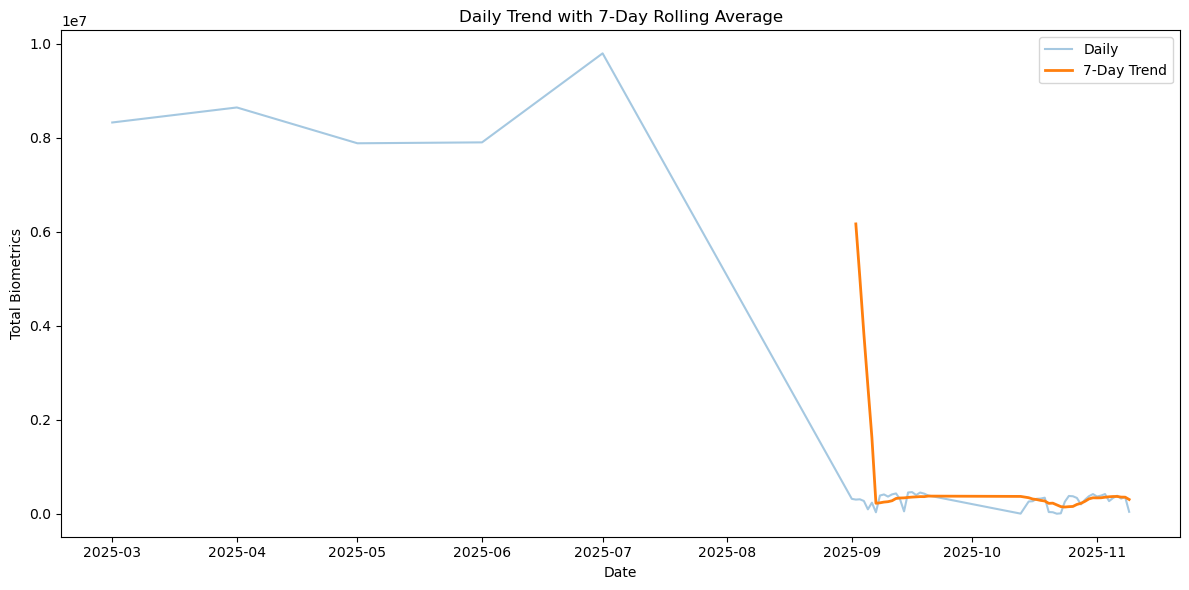

In [33]:
#7 days rolling average
daily['rolling_7'] = daily['total_bio'].rolling(window=7).mean()
print (daily)
plt.figure(figsize=(12,6))
plt.plot(daily['date'], daily['total_bio'], alpha=0.4, label="Daily")
plt.plot(daily['date'], daily['rolling_7'], linewidth=2, label="7-Day Trend")
plt.title("Daily Trend with 7-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Total Biometrics")
plt.legend()
plt.tight_layout()
plt.show()

     month  total_bio  growth_rate_%
0  2025-03    8322222            NaN
1  2025-04    8641679       3.838602
2  2025-05    7879956      -8.814526
3  2025-06    7899289       0.245344
4  2025-07    9792552      23.967512
5  2025-09    6513507     -33.485092
6  2025-10    4233854     -34.998857
7  2025-11    2883369     -31.897297


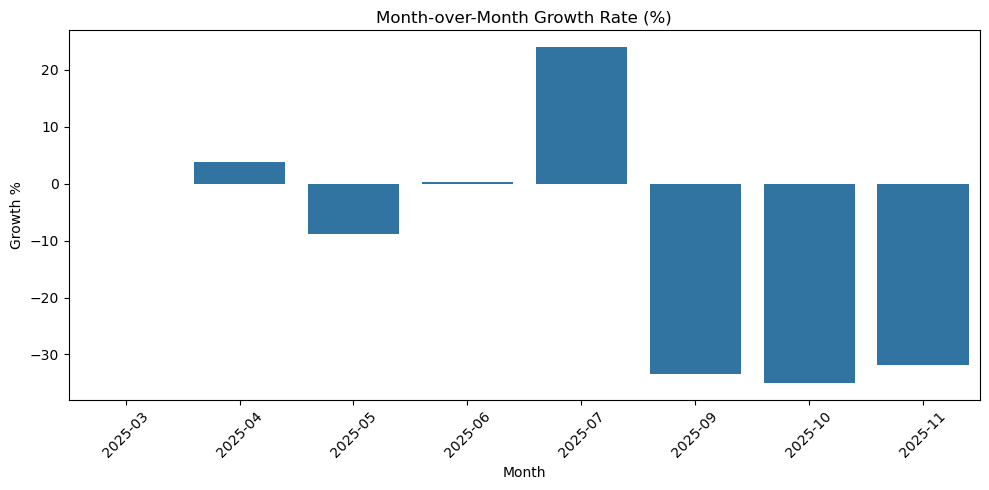

In [34]:
# MONTH-OVER-MONTH GROWTH
monthly['growth_rate_%'] = monthly['total_bio'].pct_change() * 100
print(monthly)
plt.figure(figsize=(10,5))
sns.barplot(x=monthly['month'], y=monthly['growth_rate_%'])
plt.xticks(rotation=45)
plt.title("Month-over-Month Growth Rate (%)")
plt.xlabel("Month")
plt.ylabel("Growth %")
plt.tight_layout()
plt.show()

     month  total_bio  growth_rate_%
0  2025-03    8322222            NaN
1  2025-04    8641679       3.838602
2  2025-05    7879956      -8.814526
3  2025-06    7899289       0.245344
4  2025-07    9792552      23.967512
5  2025-09    6513507     -33.485092
6  2025-10    4233854     -34.998857
7  2025-11    2883369     -31.897297
[9617352.66666667 8875481.47619048 8133610.28571429 7391739.0952381
 6649867.9047619  5907996.71428571 5166125.52380952 4424254.33333333]


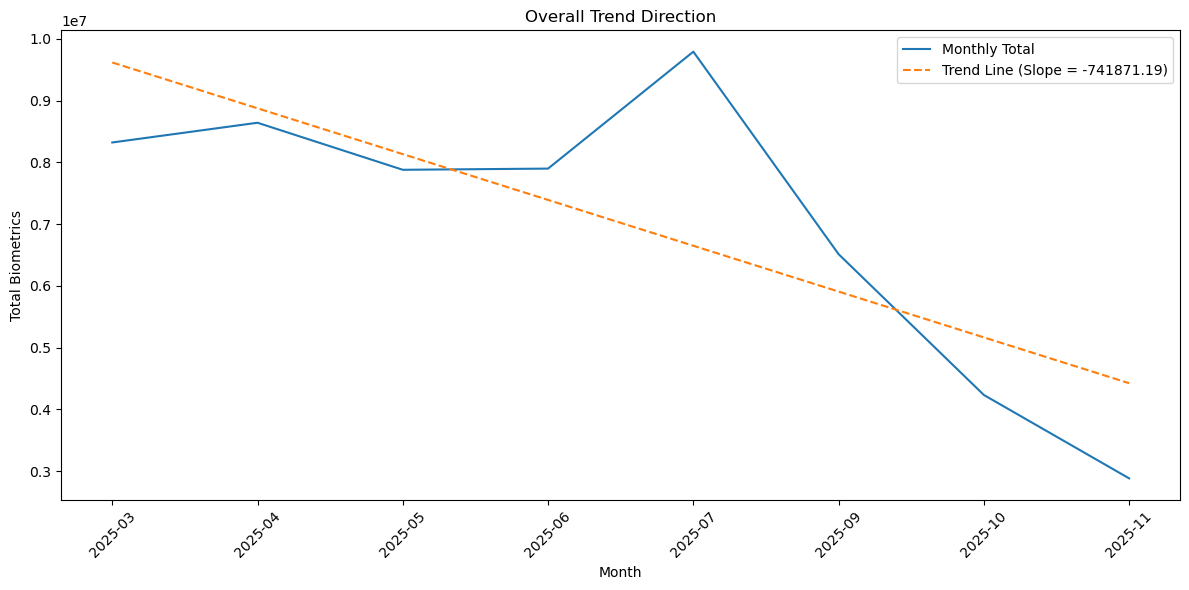

In [35]:
# TREND DIRECTION (LINEAR REGRESSION)
import numpy as np

x = np.arange(len(monthly))
y = monthly['total_bio'].values

slope, intercept = np.polyfit(x, y, 1)
trend_line = slope * x + intercept
print(monthly)
print(trend_line)
plt.figure(figsize=(12,6))
plt.plot(monthly['month'], y, label="Monthly Total")
plt.plot(monthly['month'], trend_line, linestyle='--', label=f"Trend Line (Slope = {slope:.2f})")
plt.xticks(rotation=45)
plt.title("Overall Trend Direction")
plt.xlabel("Month")
plt.ylabel("Total Biometrics")
plt.legend()
plt.tight_layout()
plt.show()


In [36]:
# BASIC TREND SUMMARY
print("TREND SUMMARY")
print("------------------")
print(f"Average Daily Biometrics: {daily['total_bio'].mean():.2f}")
print(f"Highest Day: {daily.loc[daily['total_bio'].idxmax(), 'date']} "
      f"({daily['total_bio'].max():,.0f})")
print(f"Lowest Day: {daily.loc[daily['total_bio'].idxmin(), 'date']} "
      f"({daily['total_bio'].min():,.0f})")
print(f"Monthly Trend Slope: {slope:.2f} biometrics per month")

if slope > 0:
    print("Overall Trend: INCREASING 📈")
elif slope < 0:
    print("Overall Trend: DECREASING 📉")
else:
    print("Overall Trend: STABLE ➖")

TREND SUMMARY
------------------
Average Daily Biometrics: 1080123.62
Highest Day: 2025-07-01 00:00:00 (9,792,552)
Lowest Day: 2025-10-22 00:00:00 (1,681)
Monthly Trend Slope: -741871.19 biometrics per month
Overall Trend: DECREASING 📉


     month  total_bio  growth_rate_%    moving_avg
0  2025-03    8322222            NaN           NaN
1  2025-04    8641679       3.838602           NaN
2  2025-05    7879956      -8.814526  8.281286e+06
3  2025-06    7899289       0.245344  8.140308e+06
4  2025-07    9792552      23.967512  8.523932e+06
5  2025-09    6513507     -33.485092  8.068449e+06
6  2025-10    4233854     -34.998857  6.846638e+06
7  2025-11    2883369     -31.897297  4.543577e+06


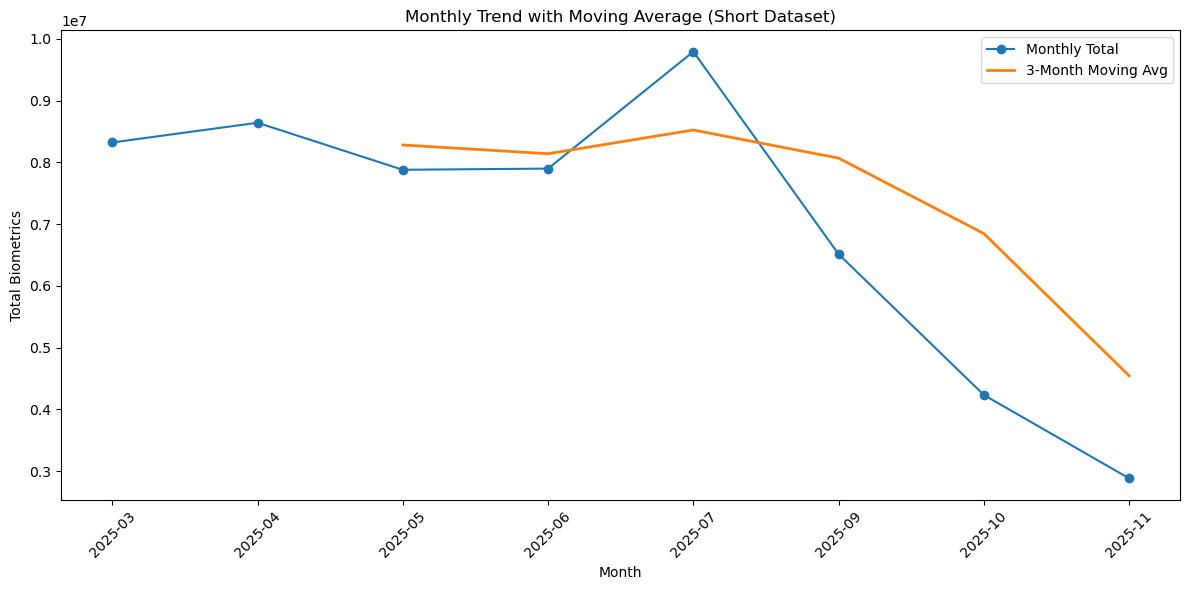

In [37]:
# TREND SMOOTHING INSTEAD OF SEASONALITY
monthly['moving_avg'] = monthly['total_bio'].rolling(window=3).mean()
print(monthly)
plt.figure(figsize=(12,6))
plt.plot(monthly['month'], monthly['total_bio'], marker='o', label='Monthly Total')
plt.plot(monthly['month'], monthly['moving_avg'], linewidth=2, label='3-Month Moving Avg')
plt.xticks(rotation=45)
plt.title("Monthly Trend with Moving Average (Short Dataset)")
plt.xlabel("Month")
plt.ylabel("Total Biometrics")
plt.legend()
plt.tight_layout()
plt.show()
